### Decision Trees

Jay Urbain, PhD

References:

- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning, with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4.

- [scikit-learn](http://scikit-learn.org/stable/) 

*Advantages of decision trees are:*

- Simple to understand and to interpret. Trees can be visualised.

- Can fit complex non-linear decision spaces.

- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created, and blank values to be removed. 

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. 

- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained. By contrast, in a black box model (e.g., in a neural network), results may be more difficult to interpret.

- *Note: some decision tree models require support for missing values.*


*The disadvantages of decision trees include:*

- Decision-tree learners can create overly complex trees that do not generalize the data well. This is called **overfitting**. Mechanisms such as pruning (not currently supported by scikit-learn), setting the minimum number of samples required at a leaf node, or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble, i.e., combining multiple decision trees.

- The problem of learning an optimal decision tree is known to be *NP-complete* under several aspects of optimality. Even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as using a **greedy algorithm**, where locally optimal decisions are made at each node. 

- Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity, or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with a decision tree.

Decision Trees (DTs) are considered a *non-parametric supervised learning method* used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Nonparametric statistics are statistics *not* based on parameterized families of probability distributions such as assuming we have a gaussian distribution that can be *parameterized* by the mean and variance of the distribution. The non-parametric model does not have any parameters: parameters are determined by the training data, not the model.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. 

The deeper the tree, the more complex the decision rules and the *fitter* the model.

Below, a Random Forest is used to create an ensemble model of multiple trees. The decision trees are used to fit a sine curve with the addition of a noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine of details in the training data and learn from the noise, i.e. they overfit.


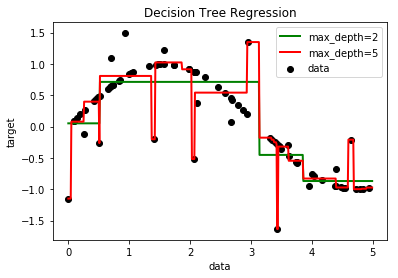

In [3]:
# plots within notebook versus launching a separate window
%matplotlib inline 

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

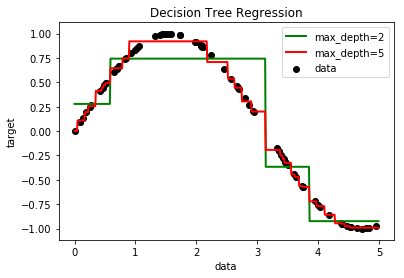

In [2]:
# plots within notebook versus launching a separate window
%matplotlib inline 

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
#y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Decision trees can build complex decision boundaries by dividing the feature
space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting. 

## Regression trees

Goal: **predict a baseball player's Salary** based on **Years** (number of years playing in the major leagues) and **Hits** (number of hits he made in the previous year). Here is the training data, represented visually (low salary is blue/green, high salary is red/yellow):

<img src="salary_color.png">

**How might you "stratify" or "segment" the feature space into regions, based on salary?** Intuitively, you want to **maximize** the similarity (or "homogeneity") within a given region, and **minimize** the similarity between different regions.

Below is a regression tree that has been fit to the data by a computer. (We will talk later about how the fitting algorithm actually works.) Note that  Salary is measured in thousands and has been log-transformed.

<img src="salary_tree.png">

**How do we make Salary predictions (for out-of-sample data) using a decision tree?**

- Start at the top, and examine the first "splitting rule" (Years < 4.5).
- If the rule is True for a given player, follow the left branch. If the rule is False, follow the right branch.
- Continue until reaching the bottom. The predicted Salary is the number in that particular "bucket".
- *Side note:* Years and Hits are both integers, but the convention is to label these rules using the midpoint between adjacent values.

Examples predictions:

- Years=3, then predict 5.11 ($\$1000 \times e^{5.11} \approx \$166000$)
- Years=5 and Hits=100, then predict 6.00 ($\$1000 \times e^{6.00} \approx \$403000$)
- Years=8 and Hits=120, then predict 6.74 ($\$1000 \times e^{6.74} \approx \$846000$)

**How did we come up with the numbers at the bottom of the tree?** Each number is just the **mean Salary in the training data** of players who fit that criteria. Here's the same diagram as before, split into the three regions:

<img src="salary_regions.png">

### Question 1

Using the decision tree above, what would you predict for the $ salary of a player who has played for 4 years and has 150 hits?

#### answer 1
Above, for 3 years you said: Years=3, then predict 5.11 ( $1000×𝑒5.11≈$166000 ).

I believe the same prediction will come for this scenario -> $166000

### Question 2

Imagine that you are doing cost complexity pruning as discussed in class. You fit two trees, $T_1$ is fit at $\alpha=1$, and $T_2$ is fit at $\alpha=2$

Which of the following is true (enter one option)?

- $T_1$ will have at least as many nodes as $T_2$
- $T_1$ will have at most as many nodes as  $T_2$
- Not enough information is given in the problem to decide

### Question 3

You have a bag of marbles with 64 red marbles and 36 blue marbles.
What is the value of the Gini Index for that bag? Give your answer to the nearest hundredth:
    

### Question 4

What is the value of the Cross-Entropy? Give your answer to the nearest hundredth:

### Decision Tree classification with the used vehicle data set

In [3]:
# import pandas
import pandas as pd

# read in vehicle data
vehicles = pd.read_csv('used_vehicles.csv')

# print out data
vehicles

,price,year,miles,doors,type
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [4]:
# convert car to 0 and truck to 1
vehicles['type'] = vehicles.type.map({'car':0, 'truck':1})

In [5]:
# select feature columns (every column except for the 0th/price column)
feature_cols = vehicles.columns[1:]
print( "feature_cols: ", feature_cols )

# define X (features) and y (response)
X = vehicles[feature_cols]
y = vehicles.price

feature_cols:  Index(['year', 'miles', 'doors', 'type'], dtype='object')


In [6]:
# split into train/test
# Note: model_selection package resolves cross_validation deprication warning
import sklearn.model_selection

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

In [7]:
# print out each of the arrays
print (X_train)
print (y_train)
print (X_test)
print (y_test)

    year   miles  doors  type
9   2003  160000      4     0
8   2003  138000      2     0
11  2001   62000      4     0
5   2006  124000      2     0
9     1900
8     3000
11    5000
5     4000
Name: price, dtype: int64
    year   miles  doors  type
3   2009   78000      4     0
7   2004  209000      4     1
6   2004  177000      4     0
2   2010   73500      4     0
10  2003  190000      2     1
4   2007   47000      4     0
1   2010   30000      2     0
12  1999  163000      2     1
0   2012   13000      2     0
13  1997  138000      4     0
3      9500
7      2000
6      3000
2     13000
10     2500
4      9000
1     14000
12     1800
0     22000
13     1300
Name: price, dtype: int64


In [8]:
# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [9]:
# make predictions
preds = treereg.predict(X_test)

# print predictions and actual values
print (preds)
print (y_test)

[ 4000.  1900.  1900.  4000.  3000.  4000.  4000.  3000.  4000.  1900.]
3      9500
7      2000
6      3000
2     13000
10     2500
4      9000
1     14000
12     1800
0     22000
13     1300
Name: price, dtype: int64


In [10]:
# print RMSE
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds))

7506.7969201251208

In [11]:
# use cross-validation to find best max_depth
from sklearn.model_selection import cross_val_score

### Question 5

Evaluate decision tree depths of 2, 3, 4, and 5. Identify the decision tree depth that provides the lowest mean square error and fit a tree to that depth with all of the data.

In [12]:
# Example: try max_depth=4
treereg = DecisionTreeRegressor(max_depth=4, random_state=1)
scores = cross_val_score(treereg, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4704.0052694797387

In [13]:
# Example: try max_depth=3


In [14]:
# Example: try max_depth=2


In [15]:
# Fit a tree using your optimal tree depth parameter with ALL of the DATA - it is not necessarily 4


In [16]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

### Decision tree visualization

To generate your own decision tree visualization:  

1) Install [graphviz](http://www.graphviz.org/)

2) Execute the cell below to import graphviz and export a graphic "dot" file.

3) execute "dot -Tpng vehicles.dot -o vehicles.png" in a command window, or use the GraphViz application to read in your *.dot file and convert it into a *.png file.

Otherwise, you're stuck with my image.

In [17]:
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("vehicles.dot", 'w') as f:
    f = export_graphviz(treereg, out_file=f, feature_names=feature_cols)

# To generate your own plots:
# at the command line, run this to convert to PNG:
# dot -Tpng vehicles.dot -o vehicles.png

from IPython.display import Image
Image(filename='vehicles.png')

AttributeError: 'NoneType' object has no attribute 'children_left'

### Question 6

From the decision tree generated above (or anlalytically from your decision tree prediction model), what is the value of a 1999 Honda CRV with 240,000 miles?

Is this a reliable estimate? *Hint: look at the MSE at the leaf node.*

### Interpreting a tree diagram

How do we read this decision tree?

**Internal nodes:**

- "samples" is the number of observations in that node before splitting
- "mse" is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- first line is the condition used to split that node (go left if true, go right if false)

**Leaves:**

- "samples" is the number of observations in that node
- "value" is the mean response value in that node
- "mse" is the mean squared error calculated by comparing the actual response values in that node against "value"

### Predicting for out-of-sample data

How accurate is scikit-learn's regression tree at predicting the out-of-sample data?

How accurate is the regression tree model at predicting out-of-sample data? I.e., data that it has not been trained on.

In [ ]:
# read in out-of-sample data
oos = pd.read_csv('used_vehicles_oos.csv')

# convert car to 0 and truck to 1
oos['type'] = oos.type.map({'car':0, 'truck':1})

# print data
oos

In [ ]:
# define X and y
X_oos = oos[feature_cols]
print X_oos
y_oos = oos.price

In [ ]:
# make predictions on out-of-sample data
preds = treereg.predict(X_oos)

# print predictions and actual values
print preds
print y_oos.values

In [ ]:
# print RMSE
np.sqrt(metrics.mean_squared_error(y_oos, preds))

In [ ]:
# print RMSE for the tree you created
your_preds = [4000, 5000, 13500]
np.sqrt(metrics.mean_squared_error(y_oos, your_preds))

### Question 7

Using your treereg predictive model, predict the value of your car (or a friends car).

### Classification trees

Here is a comparison between classification trees and regression trees:

|regression trees|classification trees|
|---|---|
|predict a continuous response|predict a categorical response|
|predict using mean response of each leaf|predict using most commonly occuring class of each leaf|
|splits are chosen to minimize MSE|splits are chosen to minimize a measure of heterogeneity|

Note that classification trees handle **more than two response classes**! 

Here's an **example of a classification tree**, which predicts whether or not a patient who presented with chest pain has heart disease:

<img src="heart_tree.png">

### Splitting criteria for classification trees

Here are common options for the splitting criteria:

- **classification error rate:** fraction of training observations in a region that don't belong to the most common class
- **Gini index:** measure of total variance across classes in a region
- **cross-entropy:** numerically similar to Gini index, but uses logarithms

Which to use?

- When growing a tree, Gini index and cross-entropy are better measures of "node purity" than classification error rate. The Gini index is faster to compute than cross-entropy, so it is generally preferred (and is used by scikit-learn by default).
- When pruning a tree, classification error rate is preferable in order to maximize predictive accuracy.

Why do some splits result in leaves with the same predicted class?

- The split was performed to increase node purity, even though it didn't reduce the classification error.
- Node purity is important because we're interested in the class proportions among the observations in each region.

### Handling categorical predictors

Some implementations of classification trees will allow you to handle categorical predictors **without creating dummy variables**. When splitting on a categorical predictor, they will try splitting on **every possible combination of categories** to find the best split. In the example above, "ChestPain:bc" means that the left-hand branch consists of observations with the second and third ChestPain categories, and the right-hand branch consists of remaining observations.

**Unfortunately, scikit-learn's classification tree implementation does not support this approach.** Instead, here's how you can handle categorical predictors:

- If a predictor only has **two possible values**, code it as a single binary variable (0 or 1). Since it's treated as a number, splits will naturally occur at 0.5.
- If a predictor has **three or more possible values that are ordered**, code it as a single variable (1, 2, 3, etc). Splits will naturally occur at 1.5, 2.5, etc.
- If a predictor has **three or more possible values that are unordered**, create dummy variables and drop one level as usual. The decision tree won't know that the dummy variables are related to one another, but that shouldn't matter in terms of predictive accuracy.
- If a predictor has **thousands of possible unordered values**, then it may be best to code it as a single variable (1, 2, 3, etc) instead of using dummy variables to minimize the size of the resulting model. ([reference](http://stackoverflow.com/a/18736132/1636598))

We'll see examples of these strategies below.

### Building a classification tree in scikit-learn

We'll build a classification tree using the [Titanic data](https://www.kaggle.com/c/titanic-gettingStarted/data) provided by Kaggle.

In [ ]:
# read in the data
titanic = pd.read_csv('titanic.csv')
titanic.head(10)

In [ ]:
# look for missing values
titanic.isnull().sum()

Choose our response and a few features, and decide whether we need to adjust them:

- **survived:** This is our response, and is already encoded as 0=died and 1=survived.
- **pclass:** These are the passenger class categories (1=first class, 2=second class, 3=third class). They are ordered, so we'll leave them as-is.
- **sex:** This is a binary category, so we should encode as 0=female and 1=male.
- **age:** We need to fill in the missing values.
- **embarked:** This is the port they emarked from. There are three unordered categories, so we'll create dummy variables.

In [ ]:
# encode sex feature
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})

# fill in missing values for age
titanic.age.fillna(titanic.age.mean(), inplace=True)

# print the updated DataFrame
titanic.head(10)

In [ ]:
# create three dummy variables using get_dummies
pd.get_dummies(titanic.embarked, prefix='embarked').head(10)

In [ ]:
# create three dummy variables, drop the first dummy variable, and store this as a DataFrame
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked').iloc[:, 1:]

# concatenate the two dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head(10)

In [ ]:
# create a list of feature columns
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']

# define X and y
X = titanic[feature_cols]
y = titanic.survived

In [ ]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

In [ ]:
# create a Graphviz file
with open("titanic.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)

<img src="titanic.png">

In [ ]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

Create a titanic decision tree using cross-entropy instead of the gini index. 

Compute feature importance and compare the results between cross-entropy and the gini index.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1, criterion='entropy')
treeclf.fit(X, y)

### Question 8

Create a titanic decision tree using the top 3 features. Calculate the accuracy of your tree. Compare the results to a tree using all features.

### Decision trees summary

Here are some advantages and disadvantages of decision trees that we haven't yet talked about:

**Advantages:**

- Can be specified as a series of rules, and are thought to more closely approximate human decision-making than other models
- Non-parametric (will do better than linear regression if relationship between predictors and response is highly non-linear)


**Figure:**

- **Left: linear model decision boundary fit (e.g., simple logistic regression)**
- **Right: non-linear decision boundary fit (decision tree)**

<img src="linear_vs_tree.png">

**Disadvantages:**

- Small variations in the data can result in a completely different tree
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree
- Can create biased trees if the classes are highly imbalanced

Note that there is not just one decision tree algorithm; instead, there are many variations. A few common decision tree algorithms that are often referred to by name are C4.5, C5.0, and CART. (More details are available in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).) scikit-learn uses an "optimized version" of CART.